In [1]:
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

# Caracterización de Sistemas en el Dominio del Tiempo


## Convolución

A partir del estudio de la respuesta impulsional se observa que la [convolución](https://en.wikipedia.org/wiki/Convolution) resulta una operación relevante en el análisis de sistemas. 
En esta sección, se estudiarán las propiedades y se interpretará la convolución.

La  convolución de dos señales $x(t)$ y $h(t)$ es:

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

Note que $*$ se usa como notación para la convolución.



### Propiedades

Dadas las señales $x(t)$, $h(t)$, $g(t) \in \mathbb{C}$ la convolución cumple con: 

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

1. El impulso de Dirac es el [elemento identidad](https://en.wikipedia.org/wiki/Identity_element) de la convolución
    \begin{equation}
    x(t) * \delta(t) = x(t)
    \end{equation}

2. La convolución es [conmutativa](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    x(t) * h(t) = h(t) * x(t)
    \end{equation}

3. La convolución es [asociativa](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ x(t) * h(t) \right] * g(t) = x(t) * \left[ h(t) * g(t) \right] 
    \end{equation}

5. La convolución es [distributiva](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x(t) * \left[ h(t) + g(t) \right] = x(t) * h(t) + x(t) * g(t)
    \end{equation}

5. Multiplicación por un escalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left[ x(t) * h(t) \right] = \left[ a \cdot x(t) \right] * h(t) = x(t) * \left[ a \cdot h(t) \right]
    \end{equation}

6. Derivada de la convolución
    \begin{equation}
    \frac{d}{dt} \left[ x(t) * h(t) \right] =  \frac{d x(t)}{dt} * h(t) = x(t) * \frac{d h(t)}{dt}
    \end{equation}




### Interpretación

La convolución puede someterse a una [interpretación gráfica](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). 

La operación de convolución:

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}


Puede descomponerse en:

1. sustituir $t$ por $\tau$ en $x(t)$ y $h(t)$,

2. invertir el tiempo en $h(\tau)$,

3. desplazar $h(-\tau)$ un tiempo $t$ para obtener $h(t - \tau)$,

4. buscar los traslapes temporales entre $h(t - \tau)$ y $x(\tau)$, calcular la integral en el periodo de traslape para obtener $y(t)$

Considere el siguiente ejemplo.

**Ejemplo**

La convolución $y(t) = x(t) * h(t)$ se ilustra para un par de señales definidas.

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \frac{3}{4} \cdot \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


(Se van a definir nuevas funciones para facilitar los códigos.)


In [2]:
t, tau = sym.symbols('t tau', real=True)

class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

def plot_signals(x_axis, x, h, ylabel, xlabel):
    plt.rcParams['figure.figsize'] = 7, 2

    p1 = sym.plot(x, (x_axis, -5, 5), show=False,
                  line_color='C0', ylabel=ylabel, xlabel=xlabel,legend=True, label = '$x$')
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='C1',legend=True, label = '$h$')
    p1.extend(p2)
    p1.show()

Se definen y grafican las señales.

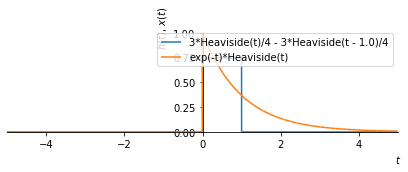

In [3]:
h = sym.exp(-t) * sym.Heaviside(t)
x = sym.Rational(3, 4) * rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

**Primero** se sustituye $t$ por $\tau$ para obtener $h(\tau)$ y $x(\tau)$.
El eje horizontal representará a $\tau$, la variable de integración.

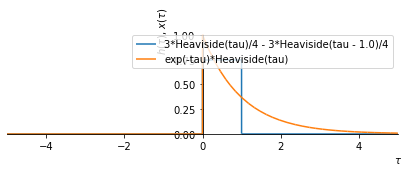

In [4]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

**Segundo** se invierte el tiempo de $h(\tau)$ para obtener $h(-\tau)$.


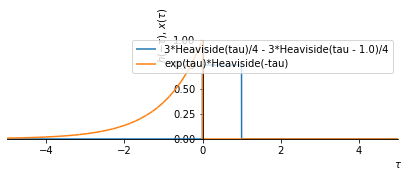

In [5]:
h2 = h.subs(t, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

**Tercero** la señal $h(-\tau)$ se desplaza un tiempo $t$ para obtener $h(t - \tau)$. Se desplaza a la **derecha** si $t>0$ y a la **izquierda** si $t<0$.

In [6]:
h3 = h.subs(t, t-tau)
h3

**Cuarto** se buscan los traslapes temporales entre $h(t - \tau)$ y $x(\tau)$ para calcular la integral en el periodo de traslape para obtener $y(t)$

La señal $x(\tau)$ se "enciende" en $t=0$ y se "apaga" en $t=1$. Así, se pueden identificar 3 casos para las señales definidas.

1. si $t<0$ no hay traslape,
2. si $0 \leq t < 1$ hay traslape parcial,
3. si $t > 1$ hay traslape completo.

1. si $t<0$ no hay traslape

Esta situación se ilustra con $t=-2$

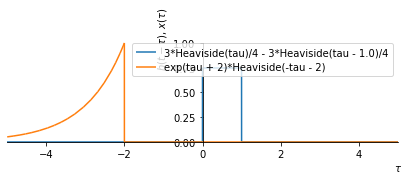

In [7]:
plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Se observa que la convolución da:

\begin{equation}
y(t) = 0 \qquad \forall t < 0
\end{equation}

2. si $0 \leq t < 1$ hay traslape parcial,

Esta situación se ilustra con $t=0.5$

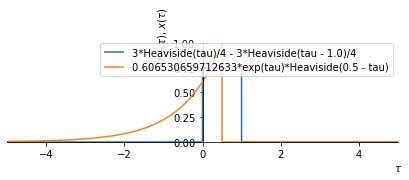

In [8]:
plot_signals(tau, x1, h3.subs(t, 0.5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

La integral de la convolución queda como:

\begin{equation}
y(t) = \frac{3}{4}\int_{0}^{t} e^{-(t - \tau)} d\tau = \frac{3}{4} (1 - e^{-t}) \qquad 0 \leq t < 1
\end{equation}

3. si $t > 1$ hay traslape completo.

Esta situación se ilustra con $t=2$

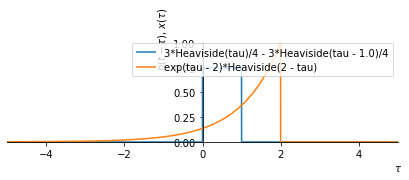

In [9]:
plot_signals(tau, x1, h3.subs(t, 2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

En este caso, la integral de la convolución queda como:

\begin{equation}
y(t) = \frac{3}{4} \int_{0}^{1} e^{-(t - \tau)} d\tau = \frac{3}{4} (e - 1) e^{-t} \qquad \text{for } t \geq 1
\end{equation}

Así, la señal de salida completa corresponde a la composición de los tres casos identificados.

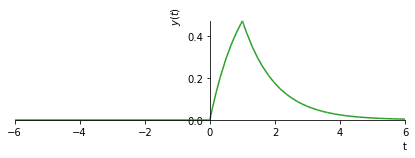

In [10]:
y = sym.integrate(h.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))
sym.plot(y, (t,-6,6), ylabel=r'$y(t)$', line_color='C2');

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from animation import animate_convolution
plt.rcParams['animation.html'] = 'jshtml'

anim = animate_convolution(x, h, y, t, tau, np.arange(-2, 5, .1), np.arange(-5, 5, 0.02))
anim

C:\Users\Usuario\.conda\envs\dynamicscontrolV202110\lib\site-packages\sympy\plotting\experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'
